### **Smoothing Methods**

**Moving Average**

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import yfinance as yf

In [31]:
stock_data = yf.download('AAPL', start='2023-01-01')
stock_data

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2023-01-03,123.632530,129.395518,122.742873,128.782649,112117500
2023-01-04,124.907707,127.181276,123.642420,125.431615,89113600
2023-01-05,123.583107,126.301500,123.326101,125.668857,80962700
2023-01-06,128.130234,128.792531,123.454601,124.561732,87754700
2023-01-09,128.654144,131.876686,128.397138,128.970474,70790800
...,...,...,...,...,...
2025-02-10,227.649994,230.589996,227.199997,229.570007,33115600
2025-02-11,232.619995,235.229996,228.130005,228.199997,53718400


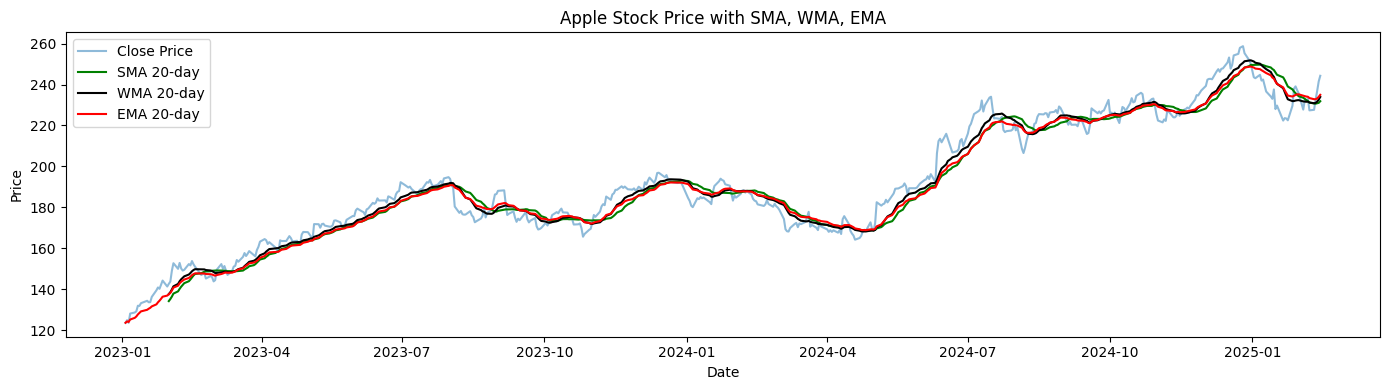

In [32]:
windows_size = 20
stock_data['SMA'] = stock_data['Close'].rolling(window=windows_size).mean()

# calclate the weighted moving average
weights = np.arange(1, windows_size+1)
stock_data['WMA'] = stock_data['Close'].rolling(window=windows_size).apply(lambda prices: np.dot(prices, weights) / weights.sum(), raw=True)

# calculate the exponential moving average
stock_data['EMA'] = stock_data['Close'].ewm(span=windows_size).mean()

# plotting
plt.figure(figsize=(14,4))

plt.plot(stock_data['Close'], label='Close Price', alpha=0.5)
plt.plot(stock_data['SMA'], label=f'SMA {windows_size}-day', color='green')
plt.plot(stock_data['WMA'], label=f'WMA {windows_size}-day', color='black')
plt.plot(stock_data['EMA'], label=f'EMA {windows_size}-day', color='red')

plt.title('Apple Stock Price with SMA, WMA, EMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()

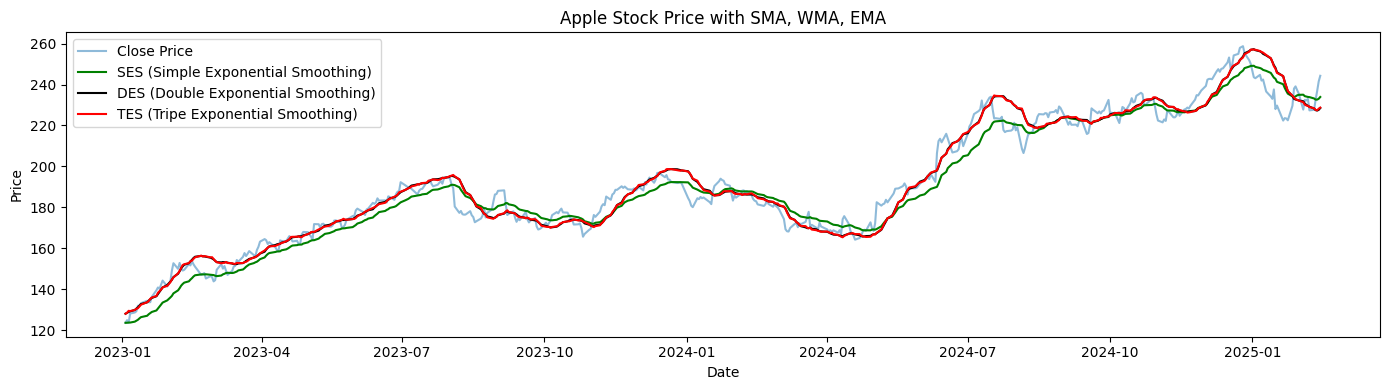

In [41]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

close_price = stock_data['Close']
ses_model = SimpleExpSmoothing(close_price).fit(smoothing_level=0.1)
stock_data['SES'] = ses_model.fittedvalues

# double exponential smoothing
des_model = ExponentialSmoothing(close_price, trend='add').fit(smoothing_level=0.1)
stock_data['DES'] = des_model.fittedvalues

# triple exponential smoothing
tes_model = ExponentialSmoothing(close_price, trend='add', seasonal='add', seasonal_periods=12).fit(smoothing_level=0.1)
stock_data['TES'] = tes_model.fittedvalues

# plotting
plt.figure(figsize=(14,4))

plt.plot(stock_data['Close'], label='Close Price', alpha=0.5)
plt.plot(stock_data['SES'], label=f'SES (Simple Exponential Smoothing)', color='green')
plt.plot(stock_data['DES'], label=f'DES (Double Exponential Smoothing)', color='black')
plt.plot(stock_data['TES'], label=f'TES (Tripe Exponential Smoothing)', color='red')

plt.title('Apple Stock Price with SMA, WMA, EMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()